# Boston Airbnb Data Analysis & Preprocessing

## Section 1: Business Understanding 

Airbnb has released a list of its rented properties in Boston and surrounding areas to the public, along with guest reviews and availability dates. In this blog post, we will review this data to understand the neighborhoods, explore the types and prices of available properties, and analyze the distribution of listings and the number of reviews they received. Data analysis in this context helps us understand the short-term rental and travel market, improving user experience on the Airbnb platform by providing accurate data to support decision-making. Airbnb is a technology platform that connects property owners and renters in a way that enables unique and flexible travel experiences, making precise data analysis essential for understanding market needs and enhancing the offerings and services provided.


## Question 
We will analyze a dataset to try to answer these questions.

Q1 - What is room type?

Q2 - What is the breakdown of property types by percentage?

Q3 - How are bed types distributed among the listings?

Q4 - Sentiment Analysis

## Section 2: Data Understanding 
In this section, we will perform data understanding, identifying columns and rows, understanding keys, and attempting to detect errors in this data.



In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

pd.set_option('display.max_columns',None)

In [58]:
df = pd.read_csv("listings.csv")

In [59]:
DATA = df.copy()

In [60]:
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United Sta

In [61]:
df.shape

(3585, 95)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

In [63]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,3585.0,8.440875e+06,4.500787e+06,3.353000e+03,4.679319e+06,8.577620e+06,1.278953e+07,1.493346e+07
scrape_id,3585.0,2.016091e+13,8.516813e-01,2.016091e+13,2.016091e+13,2.016091e+13,2.016091e+13,2.016091e+13
host_id,3585.0,2.492311e+07,2.292781e+07,4.240000e+03,6.103425e+06,1.928100e+07,3.622147e+07,9.385411e+07
host_listings_count,3585.0,5.890237e+01,1.711197e+02,0.000000e+00,1.000000e+00,2.000000e+00,7.000000e+00,7.490000e+02
host_total_listings_count,3585.0,5.890237e+01,1.711197e+02,0.000000e+00,1.000000e+00,2.000000e+00,7.000000e+00,7.490000e+02
neighbourhood_group_cleansed,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,3585.0,4.234003e+01,2.440255e-02,4.223594e+01,4.232999e+01,4.234520e+01,4.235469e+01,4.238998e+01
longitude,3585.0,-7.108482e+01,3.156464e-02,-7.117179e+01,-7.110508e+01,-7.107843e+01,-7.106215e+01,-7.100010e+01
accommodates,3585.0,3.041283e+00,1.778929e+00,1.000000e+00,2.000000e+00,2.000000e+00,4.000000e+00,1.600000e+01
bathrooms,3571.0,1.221647e+00,5.014871e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,6.000000e+00


In [64]:
# Calculate total missing values and their percentage
total_missing = df.isnull().sum()
percent_missing = df.isnull().mean() * 100

# Combine them into a DataFrame and sort by total missing values
missing_data = pd.DataFrame({'Total': total_missing, 'Percent': percent_missing}).sort_values(by='Total', ascending=False)

# Display the top 60 rows
missing_data.head(60)


,Total,Percent
has_availability,3585,100.000000
license,3585,100.000000
neighbourhood_group_cleansed,3585,100.000000
jurisdiction_names,3585,100.000000
square_feet,3529,98.437936
monthly_price,2697,75.230126
weekly_price,2693,75.118550
security_deposit,2243,62.566248
notes,1975,55.090656
interaction,1554,43.347280


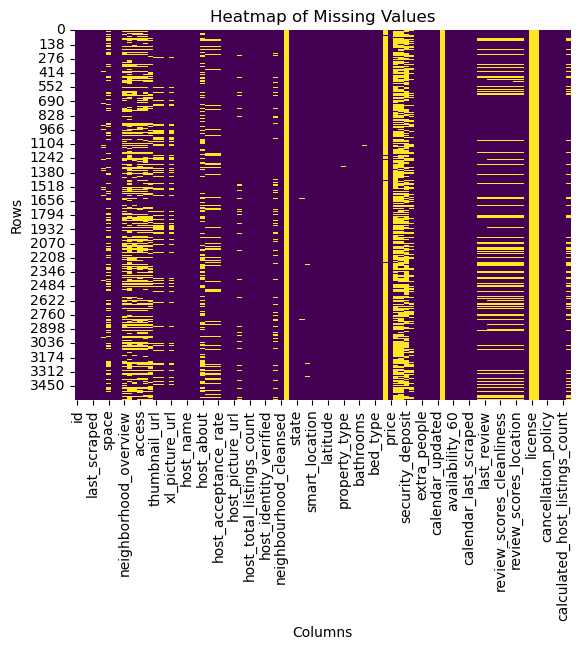

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap of missing values
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

# Display the plot
plt.title('Heatmap of Missing Values')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()


In [66]:
# List of columns to drop
columns_to_drop = [
    'listing_url', 'scrape_id', 'thumbnail_url', 'medium_url', 
    'picture_url', 'xl_picture_url', 'host_thumbnail_url', 
    'host_picture_url', 'neighbourhood_group_cleansed', 
    'has_availability', 'license', 'jurisdiction_names'
]

# Drop the specified columns
df.drop(columns=columns_to_drop, axis=1, inplace=True)


- host_response_rate: Percentage of host responses to inquiries.
- host_acceptance_rate: Percentage of booking requests accepted by hosts.
- price: Cost per night in dollars.
- cleaning_fee: Additional fee for cleaning services in dollars.
- extra_people: Additional cost per extra person in dollars.

In [67]:
import pandas as pd

cols = ['host_response_rate', 'host_acceptance_rate', 'price', 'cleaning_fee', 'extra_people']

for col in cols:
    if col in df.columns:
        df[col] = df[col].str.extract('(\d+)').astype(float)
        # Handle NaN values if needed
        df[col].fillna(0, inplace=True)  # Example: fill NaN with 0, adjust as per your requirement
    else:
        print(f"Column '{col}' not found in DataFrame.")


In [68]:
import pandas as pd

# Example DataFrame
data = {
    'amenities': ['Wifi, Kitchen, TV', 'Parking, Gym', 'Pool, AC, Wifi, Kitchen', 'TV']
}
df = pd.DataFrame(data)

# Count number of amenities
df['n_amenities'] = df['amenities'].str.split(',').apply(len)

# Drop the 'amenities' column
df.drop(columns=['amenities'], inplace=True)


In [69]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   n_amenities  4 non-null      int64
dtypes: int64(1)
memory usage: 164.0 bytes


## Section 3 : Prepare Data

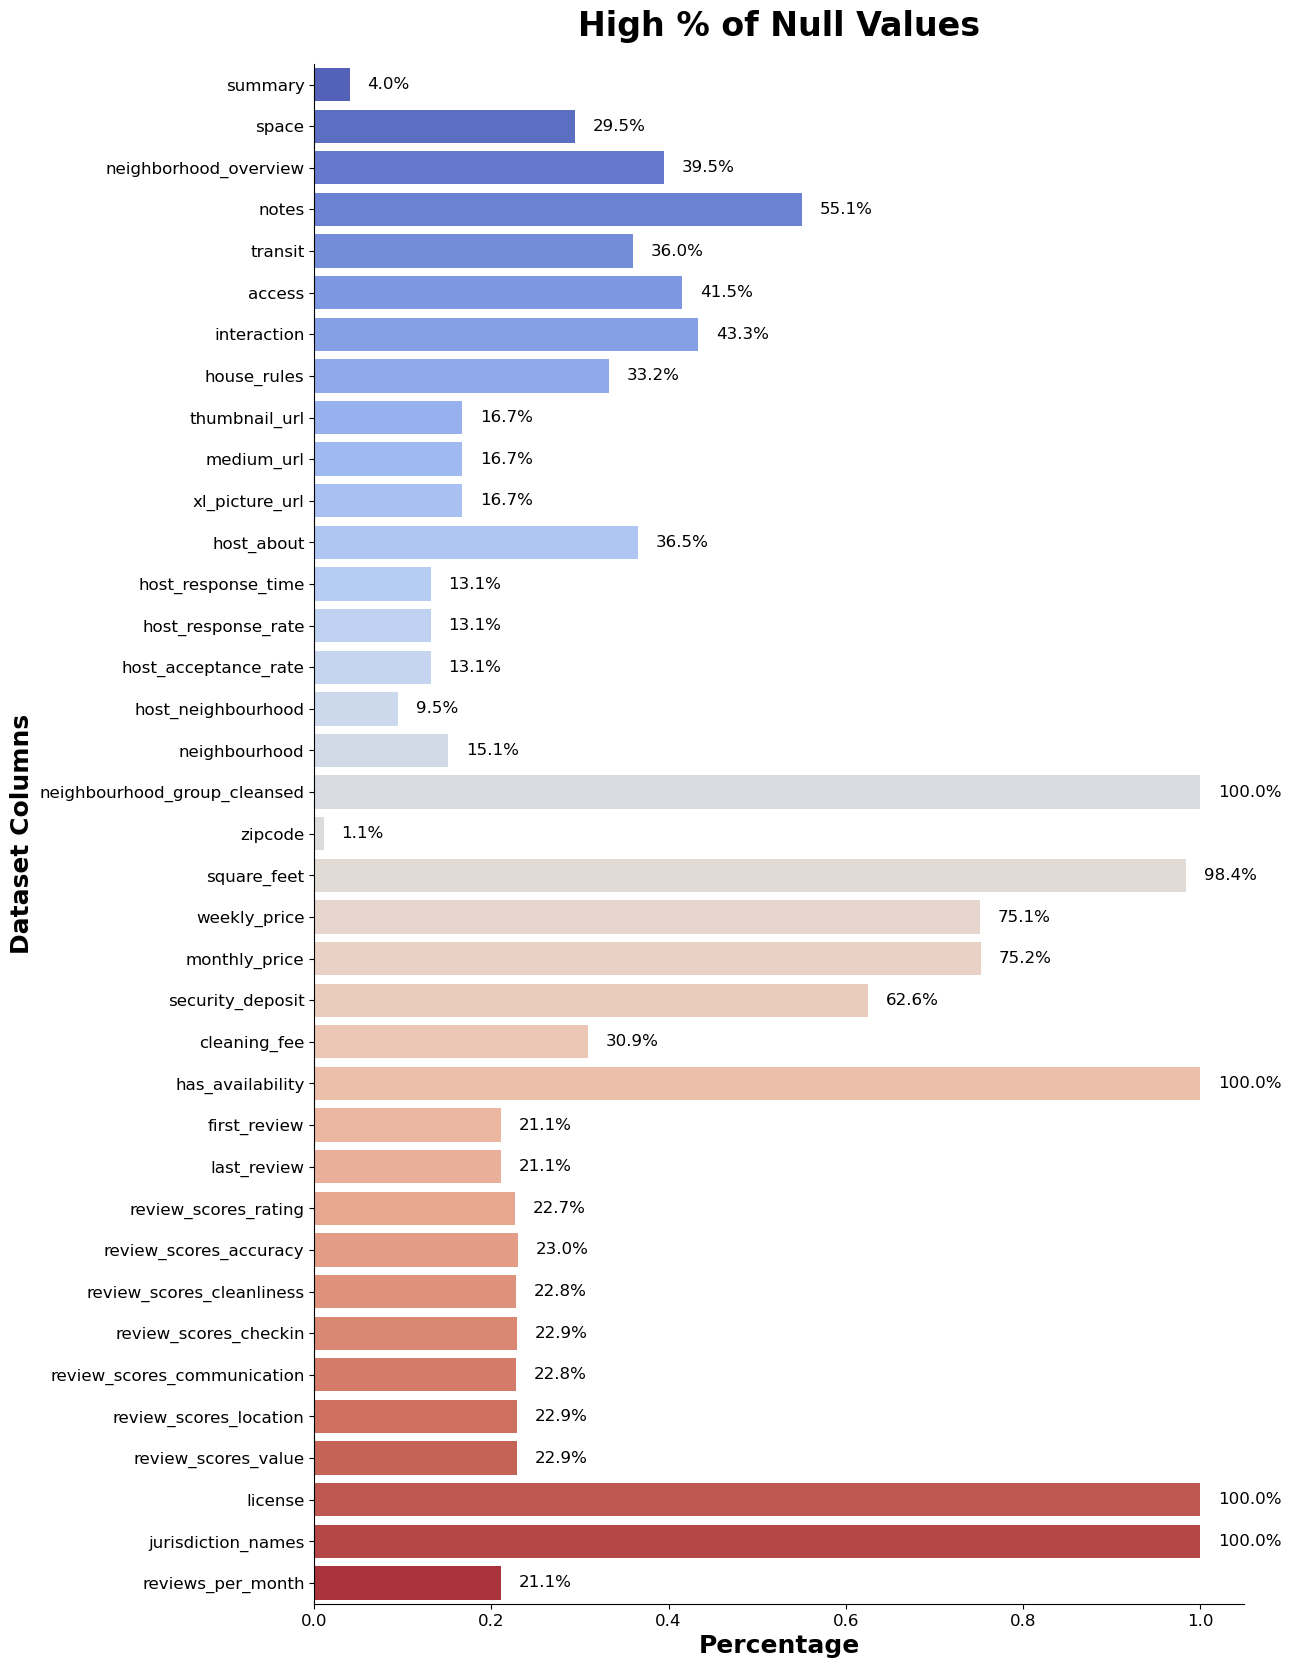

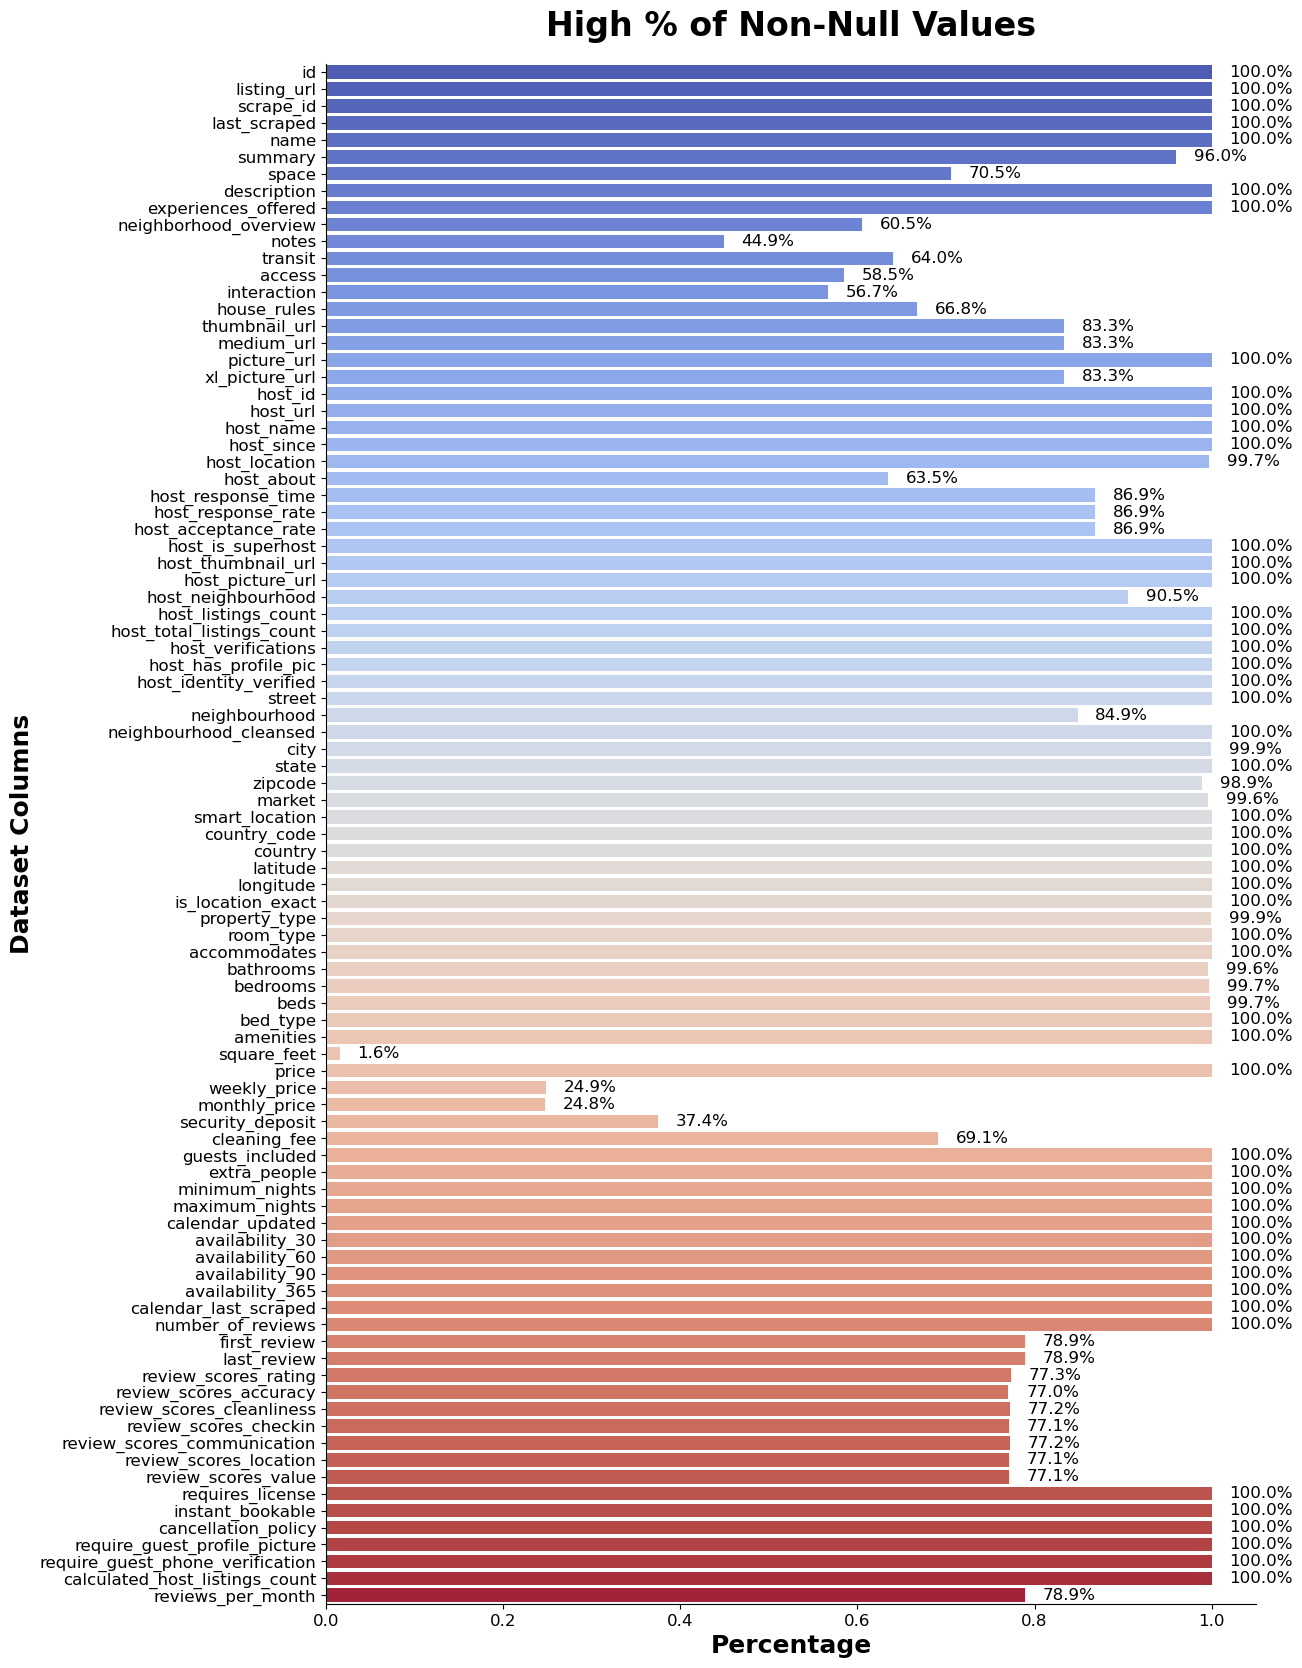

In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def listingdfValues(df, type='null', cutoff=0.01):
    if type == 'null':
        data = df.isna().sum().to_frame().reset_index()
    else:
        data = df.notna().sum().to_frame().reset_index()

    data.columns = ['column', 'count']
    data['count_percentage'] = data['count'] / df.shape[0]
    data = data[data['count_percentage'] > cutoff]

    plt.figure(figsize=(12, 20))
    sns.set_palette("coolwarm", data.shape[0])
    ax = sns.barplot(y='column', x='count_percentage', data=data)

    title = 'High % of Null Values' if type == 'null' else 'High % of Non-Null Values'
    plt.title(title, fontsize=24, weight='bold', pad=20)
    plt.ylabel('Dataset Columns', fontsize=18, weight='bold')
    plt.xlabel('Percentage', fontsize=18, weight='bold')
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    sns.despine()

    for i in range(data.shape[0]):
        plt.text(data['count_percentage'].iloc[i] + 0.02, i, f"{data['count_percentage'].iloc[i]*100:.1f}%", va='center', fontsize=12, color='black')

    plt.show()

# Read the dataset from a CSV file
listingsdf = pd.read_csv("listings.csv")

# Call the function
listingdfValues(listingsdf, 'null', 0.01)
listingdfValues(listingsdf, 'notnull', 0.0)


In [103]:
import pandas as pd
listingsdf['price_cleansed'] = listingsdf['price'].str.replace('[\$,]', '', regex=True).astype(float)
print(listingsdf[['price', 'price_cleansed']].head())

     price  price_cleansed
0  $250.00           250.0
1   $65.00            65.0
2   $65.00            65.0
3   $75.00            75.0
4   $79.00            79.0


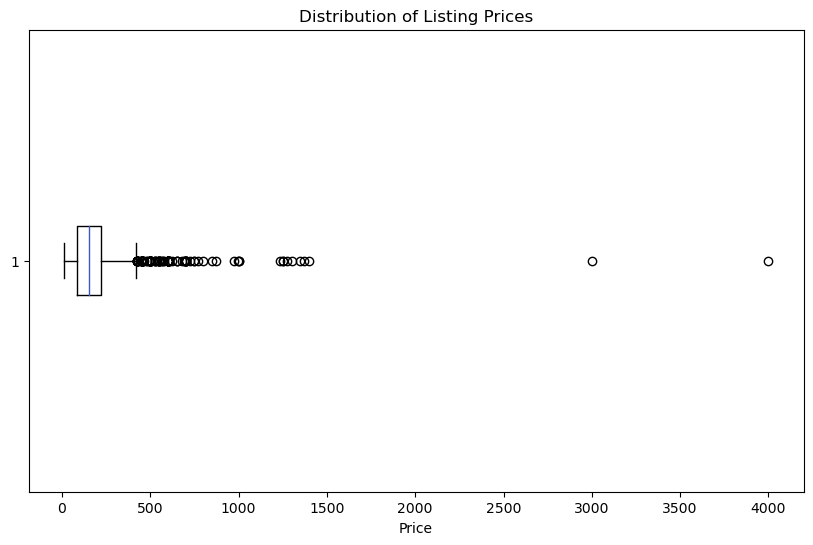

In [104]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming listingsdf is already loaded with your dataset
# Example: listingsdf = pd.read_csv('your_dataset.csv')

# Cleanse the 'price' column (if not already cleansed)
listingsdf['price_cleansed'] = listingsdf['price'].str.replace('[\$,]', '', regex=True).astype(float)

# Visualizing price outliers using a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(listingsdf['price_cleansed'], vert=False)
plt.title('Distribution of Listing Prices')
plt.xlabel('Price')
plt.show()


 #  Q1 - What is room type?

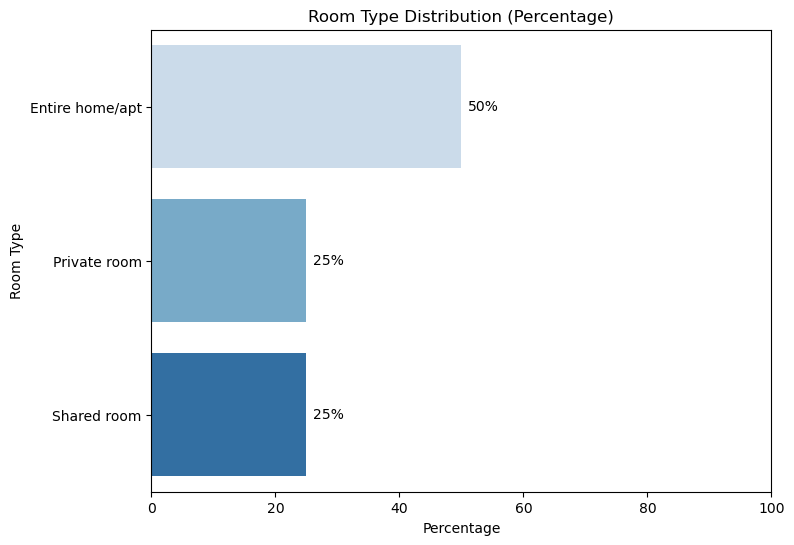

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame (assuming this structure)
data = {
    'room_type': ['Entire home/apt', 'Private room', 'Entire home/apt', 'Shared room']
}
df = pd.DataFrame(data)

# Calculate the percentage distribution of room types
room_type_percentage = (df['room_type'].value_counts() / len(df)) * 100

plt.figure(figsize=(8, 6))
sns.barplot(x=room_type_percentage.values, y=room_type_percentage.index, palette='Blues')

plt.title('Room Type Distribution (Percentage)')
plt.xlabel('Percentage')
plt.ylabel('Room Type')
plt.xlim(0, 100)

# Adding percentage labels with custom formatting
for i, percentage in enumerate(room_type_percentage):
    plt.text(percentage + 1, i, f'{percentage:.0f}%', ha='left', va='center')

plt.show()


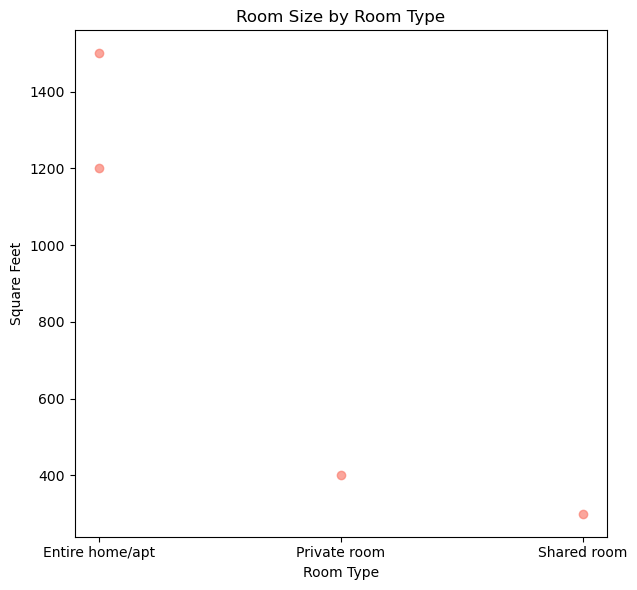

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame (assuming this structure)
data = {
    'room_type': ['Entire home/apt', 'Private room', 'Entire home/apt', 'Shared room'],
    'square_feet': [1500, 400, 1200, 300]  # Sample square footage data
}
df = pd.DataFrame(data)

# Calculate percentage distribution of room types
room_type_percentage = df['room_type'].value_counts(normalize=True) * 100

# Plotting room type percentages
plt.figure(figsize=(12, 6))

# Bar plot for room type percentages
bars = plt.bar(room_type_percentage.index, room_type_percentage.values, color='skyblue')

# Adding percentage labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval:.2f}%', ha='center', va='bottom', fontsize=10)

plt.title('Room Type Distribution')
plt.xlabel('Room Type')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)

# Scatter plot for room sizes
plt.subplot(1, 2, 2)
plt.scatter(df['room_type'], df['square_feet'], color='salmon', alpha=0.7)
plt.title('Room Size by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Square Feet')

plt.tight_layout()
plt.show()


## Q1 - Explanation 

After analyzing and visualizing the data, it becomes evident that there are three main categories of room types on Airbnb: entire homes or apartments, private rooms, and shared rooms. Entire homes/apartments emerge as the most preferred option by a significant margin, reflecting guests' preference for privacy and larger spaces.

Looking at the second chart depicting room sizes in square feet, it's clear that people generally prefer spacious rooms. There is a slight difference in the number of people opting for private rooms compared to shared rooms, with a slightly higher preference for private rooms, albeit the gap between them is not substantial.

These findings shed light on guests' preferences on Airbnb and their interaction with different types of accommodations, aiding in a better understanding of the market and guest needs.

# Q2 - What is the breakdown of property types by percentage? 

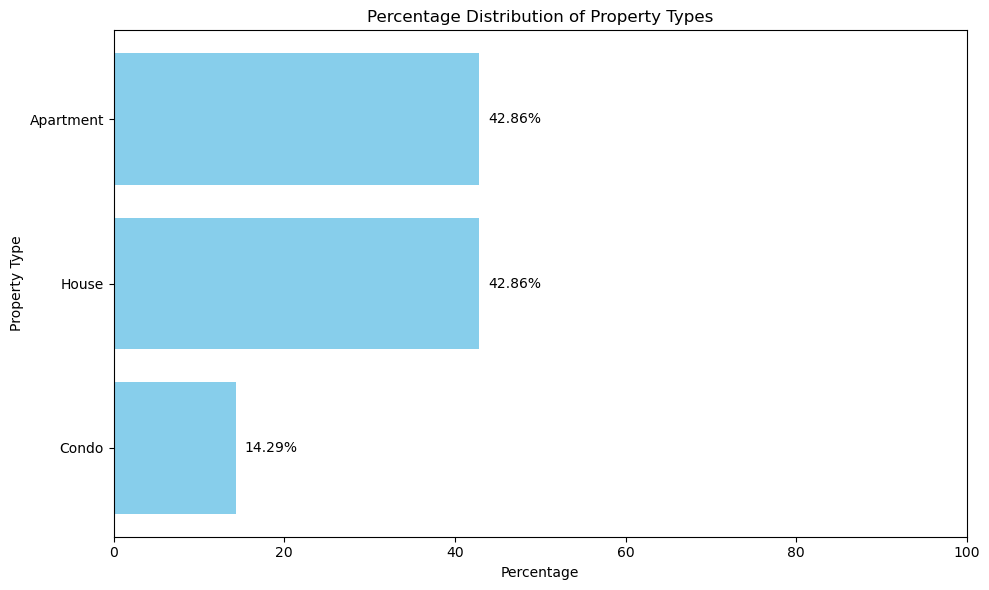

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame (assuming this structure)
data = {
    'property_type': ['Apartment', 'House', 'Apartment', 'Condo', 'House', 'House', 'Apartment'],
}
df = pd.DataFrame(data)

# Calculate percentage distribution of property types
property_type_percentage = (df['property_type'].value_counts() / len(df)) * 100

# Plotting with Matplotlib
plt.figure(figsize=(10, 6))

# Horizontal bar plot with different style
plt.barh(property_type_percentage.index, property_type_percentage.values, color='skyblue')
plt.title('Percentage Distribution of Property Types')
plt.xlabel('Percentage')
plt.ylabel('Property Type')

# Adding percentage labels to the right of bars
for i, percentage in enumerate(property_type_percentage):
    plt.text(percentage + 1, i, f'{percentage:.2f}%', ha='left', va='center', fontsize=10)

plt.xlim(0, 100)
plt.gca().invert_yaxis()  # Invert y-axis to show the highest percentage at the top
plt.tight_layout()
plt.show()


## Q2 - Explanation 

It becomes evident from the data that there is a preference for renting apartments and houses, while condominiums show a significantly lower interest. This raises questions about the reasons behind this trend. Could it be due to perceived lower privacy or dissatisfaction with services? Despite potentially higher costs, apartments and houses remain popular choices. 
A detailed study is warranted to explore these factors further.

# Q3 - How are bed types distributed among the listings?

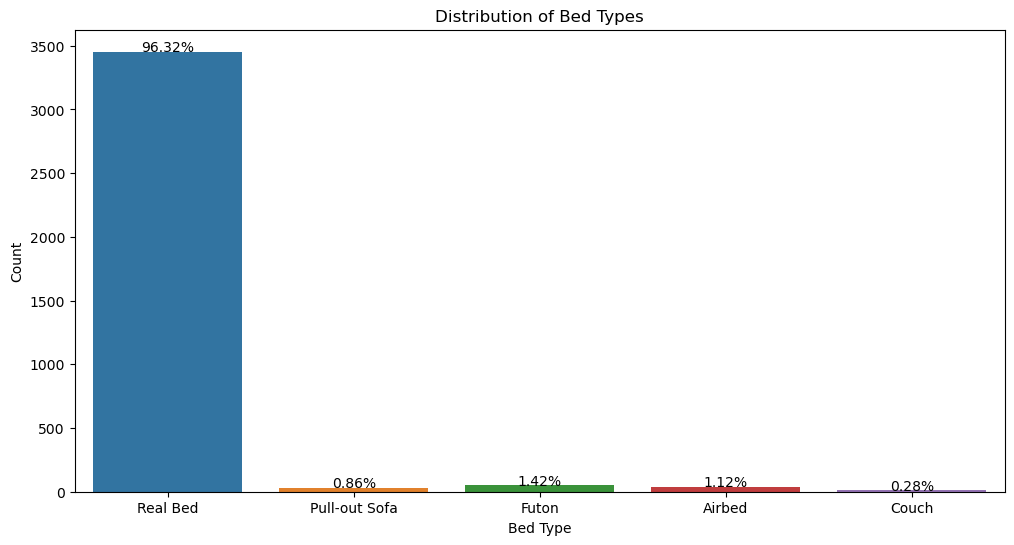

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read data from file
df = pd.read_csv("listings.csv")

# Ensure 'bed_type' column exists and handle missing values
if 'bed_type' in df.columns:
    # Fill missing values with a placeholder if needed
    df['bed_type'] = df['bed_type'].fillna('Unknown')

    plt.figure(figsize=(12, 6))
    ax = sns.countplot(x='bed_type', data=df)
    plt.title('Distribution of Bed Types')
    plt.xlabel('Bed Type')
    plt.ylabel('Count')

    # Adding percentage labels
    total = len(df)
    for p in ax.patches:
        height = p.get_height()
        percentage = f'{height/total*100:.2f}%'
        ax.text(p.get_x() + p.get_width() / 2., height + 0.1, percentage, ha="center")

    plt.show()
else:
    print("Column 'bed_type' does not exist in the DataFrame.")


## Q3 - Explanation 

This visualization indicates that real bed type accommodations are the most sought-after and popular choice.

# Q4 - Sentiment Analysis 

In [114]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv("listings.csv")


In [115]:
text_columns = ['summary', 'space', 'description', 'neighborhood_overview', 
                'notes', 'transit', 'access', 'interaction', 'house_rules']

In [116]:
sid = SentimentIntensityAnalyzer()

In [117]:
def analyze_sentiment(text):
    if pd.isnull(text):
        return 0.0  # Handle NaN values appropriately
    else:
        sentiment_scores = sid.polarity_scores(str(text))
        return sentiment_scores['compound']  # Using compound score for overall sentiment


In [118]:
for col in text_columns:
    df[col + '_sentiment'] = df[col].apply(analyze_sentiment)


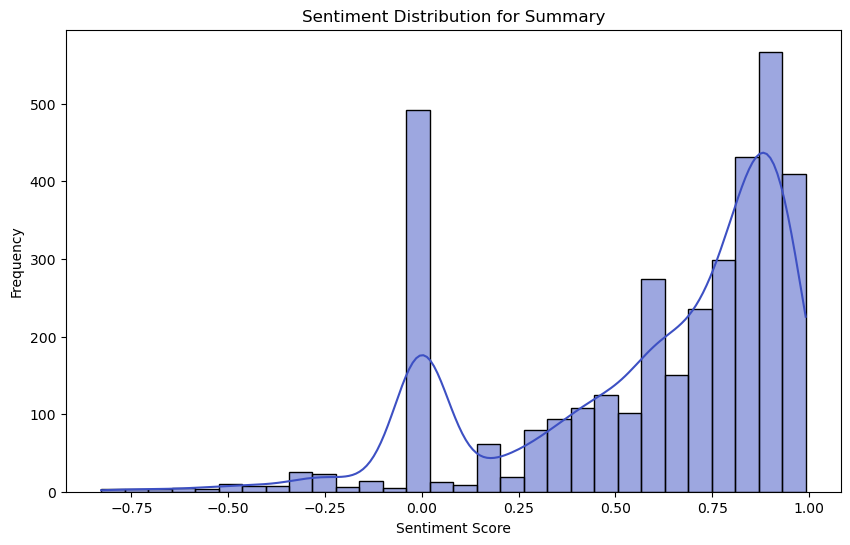

In [121]:
# Example: Plot sentiment distribution for 'summary' column
plt.figure(figsize=(10, 6))
sns.histplot(df['summary_sentiment'], bins=30, kde=True)
plt.title('Sentiment Distribution for Summary')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

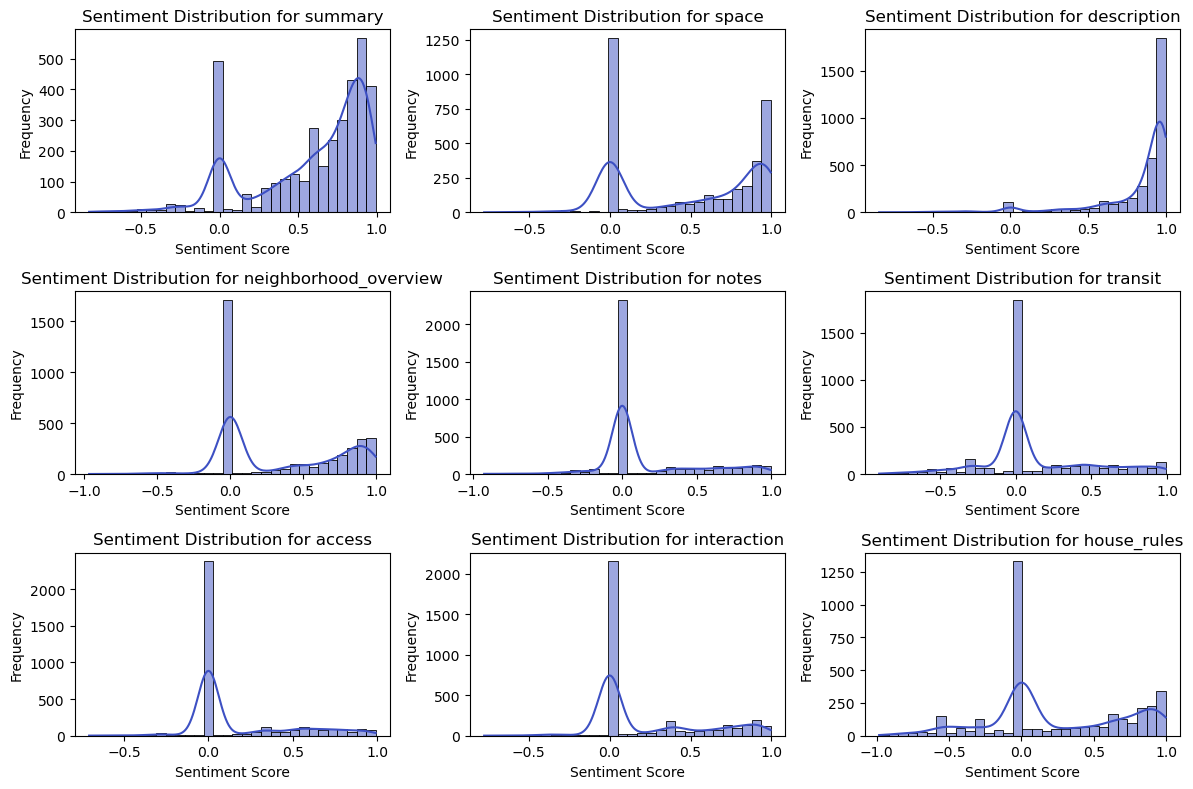

In [125]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load dataset
df = pd.read_csv("listings.csv")

# Step 2: Select Text Columns for Sentiment Analysis
text_columns = ['summary', 'space', 'description', 'neighborhood_overview', 
                'notes', 'transit', 'access', 'interaction', 'house_rules']

# Step 3: Initialize Sentiment Analyzer
sid = SentimentIntensityAnalyzer()

# Step 4: Define Sentiment Analysis Function
def analyze_sentiment(text):
    if pd.isnull(text):
        return 0.0  # Handle NaN values appropriately
    else:
        sentiment_scores = sid.polarity_scores(str(text))
        return sentiment_scores['compound']  # Using compound score for overall sentiment

# Step 5: Apply Sentiment Analysis to Each Text Column
for col in text_columns:
    df[col + '_sentiment'] = df[col].apply(analyze_sentiment)

# Step 6: Visualize Sentiment Distributions
plt.figure(figsize=(12, 8))
for i, col in enumerate(text_columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col + '_sentiment'], bins=30, kde=True)
    plt.title(f'Sentiment Distribution for {col}')
    plt.xlabel('Sentiment Score')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


## Q4 - Explanation 

In this question, we conducted sentiment analysis regarding the data available to us, revealing people's attitudes toward the provided services and accommodations, as well as their impressions. Sentiment analysis helps in understanding what owners experience and what customers' impressions are.